In [1]:
export LC_ALL=C.UTF-8

Task 1: Statistical Language Model
==========================

In the following we will use n-gram language modeling to look at domain,
an important consideration when training NMT models.  
All of the data are provided at `/data/lmdom/`.  
To train an order-n language model use
```bash
lmplz -o {order} < {training_data} > {lm_name.arpa}
```

In [2]:
lmplz -o 2 < /data/lmdom/wiki.en.txt > /tmp/wiki.arpa

=== 1/5 Counting and sorting n-grams ===
Reading /data/lmdom/wiki.en.txt
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Unigram tokens 42681165 types 1114998
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:13379976 2:216187191296
Statistics:
1 1114998 D1=0.731948 D2=1.03082 D3+=1.2829
2 9551015 D1=0.754579 D2=1.0721 D3+=1.31276
Memory estimate for binary LM:
type     MB
probing 191 assuming -p 1.5
probing 195 assuming -r models -p 1.5
trie     84 without quantization
trie     58 assuming -q 8 -b 8 quantization 
trie     84 assuming -a 22 array pointer compression
trie     58 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:13379976 2:152816240
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80--

To get the perplexity of a dataset using an arpa file use
```bash
perp.py {lm_name.arpa} {text_data}
```

In [3]:
perp.py /tmp/wiki.arpa /data/lmdom/wiki.en.txt
perp.py /tmp/wiki.arpa /tmp/wiki.arpa

Loading the LM will be faster if you build a binary file.
Reading /tmp/wiki.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
212.9959476604841
Loading the LM will be faster if you build a binary file.
Reading /tmp/wiki.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
353676.242629899


-   First, train a bigram ($n=2$) LM on the English UDHR. Use this model
    on `dev` data. What is the perplexity?   

In [4]:
lmplz -o 2 < /data/lmdom/english.udhr > /tmp/udhr.arpa

=== 1/5 Counting and sorting n-grams ===
Reading /data/lmdom/english.udhr
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Unigram tokens 1778 types 627
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:7524 2:216200567193
Statistics:
1 627 D1=0.786408 D2=1.03486 D3+=1.95146
2 1341 D1=0.8418 D2=1.35127 D3+=1.19614
Memory estimate for binary LM:
type    kB
probing 39 assuming -p 1.5
probing 41 assuming -r models -p 1.5
trie    21 without quantization
trie    18 assuming -q 8 -b 8 quantization 
trie    21 assuming -a 22 array pointer compression
trie    18 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:7524 2:21456
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
##############

In [5]:
head /data/lmdom/english.udhr

Universal Declaration of Human Rights
Preamble
Whereas recognition of the inherent dignity and of the equal and inalienable rights of all members of the human family is the foundation of freedom, justice and peace in the world,
Whereas disregard and contempt for human rights have resulted in barbarous acts which have outraged the conscience of mankind, and the advent of a world in which human beings shall enjoy freedom of speech and belief and freedom from fear and want has been proclaimed as the highest aspiration of the common people,
Whereas it is essential, if man is not to be compelled to have recourse, as a last resort, to rebellion against tyranny and oppression, that human rights should be protected by the rule of law,
Whereas it is essential to promote the development of friendly relations between nations,
Whereas the peoples of the United Nations have in the Charter reaffirmed their faith in fundamental human rights, in the dignity and worth of the human person and in the equ

In [6]:
perp.py /tmp/udhr.arpa /data/lmdom/dev

Loading the LM will be faster if you build a binary file.
Reading /tmp/udhr.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
613.303224701251


-   Now, train a bigram LM on the wikipedia data. Use this model to
    calculate the perplexity of the `dev` data. What is the perplexity?

In [7]:
perp.py /tmp/wiki.arpa /data/lmdom/dev

Loading the LM will be faster if you build a binary file.
Reading /tmp/wiki.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
2455.2919557159653


-   Finally, train a bigram LM on the novel chapter. Use this model to
    calculate the perplexity of the `dev` data. What is the perplexity?    

In [8]:
head /data/lmdom/hpchapter1.txt

Mr. and Mrs. Dursley , of number four , Privet Drive , were proud to say that they were perfectly normal , thank you very much . They were the last people you &apos;d expect to be involved in anything strange or mysterious , because they just didn &apos;t hold with such nonsense .

Mr. Dursley was the director of a firm called Grunnings , which made drills . He was a big , beefy man with hardly any neck , although he did have a very large mustache . Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck , which came in very useful as she spent so much of her time craning over garden fences , spying on the neighbors . The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere .

The Dursleys had everything they wanted , but they also had a secret , and their greatest fear was that somebody would discover it . They didn &apos;t think they could bear it if anyone found out about the Potters . Mrs. Potter was Mrs. Dursley &apos;s

In [9]:
lmplz -o 2 < /data/lmdom/hpchapter1.txt > /tmp/hpchapter1.arpa

=== 1/5 Counting and sorting n-grams ===
Reading /data/lmdom/hpchapter1.txt
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Unigram tokens 5722 types 1251
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:15012 2:216200544256
Statistics:
1 1251 D1=0.637427 D2=1.27739 D3+=1.75624
2 4003 D1=0.808964 D2=1.09147 D3+=1.53722
Memory estimate for binary LM:
type     kB
probing 102 assuming -p 1.5
probing 107 assuming -r models -p 1.5
trie     49 without quantization
trie     39 assuming -q 8 -b 8 quantization 
trie     49 assuming -a 22 array pointer compression
trie     39 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:15012 2:64048
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100

In [10]:
perp.py /tmp/hpchapter1.arpa /data/lmdom/dev

Loading the LM will be faster if you build a binary file.
Reading /tmp/hpchapter1.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
516.76552634914


-   How was the perplexity different with each of the models? Look at
    the first few lines of each training dataset, and the `dev` data.
    Why might this be?

In [11]:
head -n128 /data/lmdom/dev

A Long-Expected Party
When Mr. Bilbo Baggins of Bag End announced that he would shortly be
celebrating his eleventy-first birthday with a party of special
magnificence , there was much talk and excitement in Hobbiton .
Bilbo was very rich and very peculiar , and had been the
wonder of the Shire for sixty years , ever since his remarkable
disappearance and unexpected return . The riches he had brought back
from his travels had now become a local legend , and it was popularly
believed , whatever the old folk might say , that the Hill at Bag End
was full of tunnels stuffed with treasure . And if that was not enough
for fame , there was also his prolonged vigour to marvel at . Time wore
on , but it seemed to have little effect on Mr. Baggins . At ninety he
was much the same as at fifty . At ninety-nine they began to call him
well-preserved ; but unchanged would have been nearer the mark . There
were some that shook their heads and thought this was too much of a
good thing ; it seemed unfai

-   How do you think this would change if you used a larger order
    (e.g. 5) LM?   
    N-grams can be good models, but only if the test corpus looks like
    the training corpus. In reality, it often does not. We need to come
    up with adaptation and smoothing methods to account for this!

In [12]:
lmplz -o 4 < /data/lmdom/hpchapter1.txt > /tmp/hp_o4.arpa
perp.py /tmp/hp_o4.arpa /data/lmdom/dev

=== 1/5 Counting and sorting n-grams ===
Reading /data/lmdom/hpchapter1.txt
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Unigram tokens 5722 types 1251
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:15012 2:36800090112 3:69000175616 4:110400274432
Statistics:
1 1251 D1=0.637427 D2=1.27739 D3+=1.75624
2 4003 D1=0.82817 D2=1.23715 D3+=1.60199
3 5247 D1=0.934414 D2=1.50625 D3+=1.67374
4 5494 D1=0.976564 D2=1.54928 D3+=2.60937
Memory estimate for binary LM:
type     kB
probing 345 assuming -p 1.5
probing 404 assuming -r models -p 1.5
trie    155 without quantization
trie     92 assuming -q 8 -b 8 quantization 
trie    149 assuming -a 22 array pointer compression
trie     85 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:150

In [13]:
lmplz -o 4 < /data/lmdom/english.udhr > /tmp/udhr_o4.arpa

=== 1/5 Counting and sorting n-grams ===
Reading /data/lmdom/english.udhr
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
Unigram tokens 1778 types 627
=== 2/5 Calculating and sorting adjusted counts ===
Chain sizes: 1:7524 2:36800094208 3:69000175616 4:110400282624
Statistics:
1 627 D1=0.786408 D2=1.03486 D3+=1.95146
2 1341 D1=0.872832 D2=1.43464 D3+=1.52997
3 1551 D1=0.956688 D2=1.4091 D3+=0.813285
4 1543 D1=0.950096 D2=1.41533 D3+=0.62476
Memory estimate for binary LM:
type     kB
probing 110 assuming -p 1.5
probing 130 assuming -r models -p 1.5
trie     52 without quantization
trie     36 assuming -q 8 -b 8 quantization 
trie     50 assuming -a 22 array pointer compression
trie     34 assuming -a 22 -q 8 -b 8 array pointer compression and quantization
=== 3/5 Calculating and sorting initial probabilities ===
Chain sizes: 1:7524 2:

In [14]:
perp.py /tmp/udhr_o3.arpa /data/lmdom/dev
perp.py /tmp/udhr_o4.arpa /data/lmdom/dev

Traceback (most recent call last):
  File "kenlm.pyx", line 139, in kenlm.Model.__init__
RuntimeError: util/file.cc:76 in int util::OpenReadOrThrow(const char*) threw ErrnoException because `-1 == (ret = open(name, 00))'.
No such file or directory while opening /tmp/udhr_o3.arpa

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/bin/perp.py", line 9, in <module>
    model=kenlm.Model(arpafile)
  File "kenlm.pyx", line 142, in kenlm.Model.__init__
OSError: Cannot read model '/tmp/udhr_o3.arpa' (util/file.cc:76 in int util::OpenReadOrThrow(const char*) threw ErrnoException because `-1 == (ret = open(name, 00))'. No such file or directory while opening /tmp/udhr_o3.arpa)
Loading the LM will be faster if you build a binary file.
Reading /tmp/udhr_o4.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************

-   Perplexity is often used as intrinsic evaluation for language
    models. Let's think about what these values mean more closely.
    Suppose a 'sentence' consists of random digits. What is the
    perplexity of this sentence, if our model assigns probability
    $p=1/10$ to each digit?   

-   Consider now a natural language sentence. What is the maximum
    perplexity of a sentence with 10 tokens? With 100 tokens?   

-   Let's return to our language models. Pick one of the three datasets,
    and train trigram and 4-gram LMs as well. Evaluate the perplexity of
    the `dev` data. How is it different between the bigram, trigram, and
    4-gram models? Why might this be?   

-   One major problem with models is generalization. If we have a bigram
    we have never seen before in `dev`, our model will produce a
    probability of 0 for the sentence and we can't compute the
    perplexity (can't divide by 0!). Not good  
    In order to do something about this, people typically use smoothing
    methods. The simplest is called add-one or Laplace smoothing. This
    is as simple as it sounds: we increment the counts of all seen word
    types (unique) by 1, and the vocabulary by the same amount (size of
    the vocabulary, number of unique words)  
    Now, there is a small probability allocated for unknown words:
    unseen n-grams have $\frac{1}{N+V}$ instead of 0!
    $$\mathcal{P}_{Laplace}(w_i) = \frac{count_i + 1}{N + V}$$

    A basic bigram language model has been coded for you in python,
    `bigram_lm.py`. Use this script to train a bigram LM on
    hpchapter1.txt. It will print the model entropy.   
    In this last exercise, modify this script to use add-one smoothing.
    Now train a bigram LM. How has the entropy changed?   

In [15]:
bigram_lm.py /data/lmdom/hpchapter1.txt

The entropy of the bigram model for this file is: 3.052 bits.


In [16]:
cp /usr/local/bin/bigram_lm.py bigram_lm.py
patch bigram_lm.py <<EOF
--- /usr/local/bin/bigram_lm.py	2021-07-05 12:54:44.000000000 +0000
+++ bigram_lm.py	2022-06-20 12:38:37.247364696 +0000
@@ -39,8 +39,8 @@
         bigramsplit = k.split("_")
         hist = bigramsplit[0]
         if hist==j:
-            numer = bigramfreqs[k]
-            denom = bigramhcs[j]
+            numer = bigramfreqs[k]+1
+            denom = bigramhcs[j]+bigramnum
             frac = numer/denom
             y = math.log(frac,2)
             z = numer*y
EOF

patching file bigram_lm.py


In [17]:
./bigram_lm.py /data/lmdom/hpchapter1.txt

The entropy of the bigram model for this file is: 18.98 bits.


# MT Praktikum - Text processing and Language Models

In the directory `/data/nc19/` you will find the raw text files from
the News-Commentary corpus which we will use today for our
preprocessing, as well as the language model. The corresponding source
data you can find in  
`/data/wmt10-xlats/ref/wmt10-newssyscombtest2010-src.de.sgm`

Task 2: Word Embeddings
===============

For this exercise we are going to use pre-trained word embeddings. You
can find two different word embeddings models in

`/models/vec/Wemb.en.filtered.lowered`  
`/models/vec/GoogleNews-vectors-negative300.bin`

1)  In the appendix of this document you can find a visualization of
    some word embeddings extracted from a English and French machine
    translation model. Words are filtered under the topic "Research".

a)  Find at least three groups where you can see the similarity in
    meanings and mark them on the visualization. You can also check
    an English-French dictionary: <https://enfr.dict.cc/>.

2)  You are provided with 2 word vector files. The
    *Wemb.en.filtered.lowered* is a set of pre-trained 200-dimensional
    vectors for 10K English vocabulary, that we will mostly use for
    small experiments. The other file,
    *GoogleNews-vectors-negative300.bin* contains 3 million words. You
    can use it with the exercise if you want.

Word vectors represent semantic and syntactic relationships between
words. For example, *lady* should be closely related with *woman*.

a)  Examine the format of the embedding model file for the 10K
    English vocabulary.

In [18]:
embeddingmodel=/models/vec/Wemb.en.filtered.lowered

head -2 $embeddingmodel

echo
echo -n 'Number of "words" per line: '
cat $embeddingmodel |
    grep lady | wc -w

echo -n 'Total number of lines: '
cat $embeddingmodel | wc -l

11752 200 
writing -0.05845778 -0.09190530 -0.02589424 -0.02522317 0.05366451 -0.03952653 -0.00876886 0.03060736 0.04896607 0.01564831 -0.02506016 0.07100761 -0.03507993 0.09870563 -0.03387290 0.03568781 0.07425486 -0.00165893 -0.01051492 -0.04607708 -0.09915169 -0.06194144 0.10198937 -0.05530214 0.06205470 0.04726395 -0.13273497 -0.07304158 -0.02790424 -0.02933407 -0.00978333 -0.00992418 0.08244192 0.00541691 -0.18403657 -0.00214179 0.04029832 -0.05896970 0.09990364 0.08532872 0.10725495 -0.04863238 -0.00867876 -0.02769790 0.00943092 0.01916903 -0.06149632 0.01232205 0.12028475 0.10385244 0.04235590 -0.03068192 0.07865627 0.13650553 0.00017261 -0.04942393 -0.08356978 -0.01325239 -0.04904098 -0.08419368 -0.00181666 -0.07562856 0.04355730 0.03737382 0.11111275 -0.01255314 -0.01916555 -0.05127316 -0.05650723 -0.12051325 -0.10272507 0.03867260 -0.04309317 0.05779719 0.04092875 0.04870337 -0.07637551 -0.04755736 0.09026353 0.05602673 -0.11934358 -0.01848558 -0.00194088 0.06600038 0.0473887

b)  Check vector values of the word *lady* and *woman*.

In [19]:
# we'll just look at the first few values, since the output is pretty hard to look at otherwise
cat $embeddingmodel |
    grep -e lady -e woman |
    cut -d' ' -f1-8 | column -t

lady   0.01361018  0.04732877  -0.00540839  -0.09349286  0.01137791  -0.03702742  -0.02019745
woman  0.07737311  0.04137088  -0.01775537  -0.13916844  0.07794968  -0.01941912  0.01003982


c) Write out the first 4 and the last values of the vectors in the table.

In [20]:
cat $embeddingmodel |
    grep -e lady -e woman |
    cut -d' ' -f1-5,201

lady 0.01361018 0.04732877 -0.00540839 -0.09349286 0.01850754
woman 0.07737311 0.04137088 -0.01775537 -0.13916844 -0.02679169


| word   |$v_0$ | $v_1$ | $v_2$ | $v_3$ | \... | $v_{199}$ |
|-------|-------|-------|-------|-------|------|-----------|
|lady   | 0.013 | 0.047 |-0.005 |-0.093 | \... |  0.019    |
|woman  | 0.077 | 0.041 |-0.017 |-0.139 | \... | -0.027    |


As you can see, it is hard for us to understand the vector
representation as it is. Therefore, we are going to calculate their
distance.

3)  We can check the similarity of the words by loading the vectors and
    calculating the distance between them, using

`$ vector.py {model}`  

a) What is the most similar word to the word *lady*? What is their similarity?

In [21]:
echo -e '1\nlady' |
    vector.py $embeddingmodel |&
    grep 'most similar to'

lady is most similar to.... [('woman', 0.63404780626297)]


b) Find the most similar word for following words and fill the table.

In [22]:
query=
for word in lady book mother school great tree
do
    query="${query}1\n$word\n"
done

# sometimes I feel like all I do is write RegExes all day, every day... it's awful
echo -en "$query" |
    vector.py $embeddingmodel |&
    perl -lne '/(\w+) is most similar to\.+ \[\(\W(.*)\W, (.*)\)\]/ && print "| $1 | $2 | $3 |"' |
    column -t

|  lady    |  woman     |  0.63404780626297     |
|  book    |  magazine  |  0.6000742316246033   |
|  mother  |  mum       |  0.5940439701080322   |
|  school  |  college   |  0.5997563004493713   |
|  great   |  good      |  0.48894891142845154  |
|  tree    |  forest    |  0.5588597059249878   |


|Input word  |Most similar word  |Similarity  |
|------------|-------------------|------------|
|  lady    |  woman     |  0.63404780626297    |
|  book    |  magazine  |  0.600074291229248   |
|  mother  |  mum       |  0.594044029712677   |
|  school  |  college   |  0.5997563004493713  |
|  great   |  good      |  0.4889489412307739  |
|  tree    |  forest    |  0.5588597059249878  |

c)  Find the similarity score of following words and fill the table. When is the similarity score high?

In [23]:
query=
for word in "father dad" "human animal" "apple big" "soccer football"
do
    query="${query}2\n$word\n"
done

echo -en "$query" |
    vector.py $embeddingmodel |&
    perl -lne '/similarity between +(\w+) and (\w+) is\.+ (\S+)/ && print "| $1 | $2 | $3 |"' |
    column -t

|  father  |  dad       |  0.5393388    |
|  human   |  animal    |  0.2608136    |
|  apple   |  big       |  0.059935514  |
|  soccer  |  football  |  0.63188386   |


|word A  | word B   |similarity  |
|--------|----------|------------|
|  father  |  dad       |  0.5393388    |
|  human   |  animal    |  0.2608136    |
|  apple   |  big       |  0.059935518  |
|  soccer  |  football  |  0.63188386   |

d) Find the word which fits in the semantic relationship.

In [24]:
query=
for word in "man, husband, woman" "grass, green, sky" "tree, forest, water"
do
    query="${query}3\n$word\n"
done

echo -en "$query" |
    vector.py $embeddingmodel |&
    perl -lne '/(\w+) : (\w+) = (\w+) : \[\(\S(\w+)\S, \S+\)\]/ && print "| $1 | $2 | $3 | $4 |"' |
    column -t

|  man    |  husband  |  woman  |  wife   |
|  grass  |  green    |  sky    |  blue   |
|  tree   |  forest   |  water  |  ocean  |


------- --- --------- --- ------- --- --
  man    :   husband   =   woman   :  wife  
 grass   :    green    =    sky    :  blue  
 tree    :   forest    =   water   :  ocean   
------- --- --------- --- ------- --- --

Task 3: Neural Language Model
=====================

## 1.  Model Training

Since training a neural language model will take quite a while and
extensive computational resources, we will in the following provide
you with readily trained models, as well as the output of the
training scripts when they were trained.  
In the directory `/models/lm/penn/saves.ptb` you will find a
couple of log files, which each save the logged output during the
training of a language model. The relevant log files are:

-   `small.log`: A small model without any regularization method.

-   `nodrop.log`: A big model without regularization.

-   `best.log`: A big model with dropout and dropconnect (two
    methods for regularization).

Look at the three `.log` files and answer the following questions:

a)  How is the perplexity of the training data changing across the
    training process?

In [25]:
cat /models/lm/penn/saves.ptb/best.log |
    perl -lne '/valid ppl/ && next; /ppl +(\S+) / && print $1'

# for logfile in /models/lm/penn/saves.ptb/*.log
# do
#     logname=$(basename $logfile)
#     logname=${logname%%.log}
#     perl -ne '/valid ppl/ && next; /ppl +(\S+) / && print $1, " "' < $logfile > /tmp/training-ppls-${logname}.txt
# done

1170.42
824.30
658.72
325.18
304.76
286.99
228.43
221.66
214.12
187.13
184.63
180.18
165.46
163.10
159.65
147.79
145.90
143.85
134.04
133.38
131.88
125.74
124.50
122.94
117.54
116.33
115.17
111.95
110.66
109.55
105.78
105.37
104.86
102.99
101.82
101.21
98.46
97.57
97.20
95.52
94.75
94.33
92.96
91.49
91.52
90.23
90.14
89.38
88.99
87.97
87.73
87.28
85.62
85.54
84.15
83.97
83.61
83.15
82.32
82.15
81.14
80.98
81.05
79.73
79.39
79.30
78.13
78.09
77.94
77.75
77.41
77.22
76.34
76.20
76.08
75.49
74.58
74.53
74.79
74.51
74.23
73.66
73.32
73.20
73.26
72.76
72.37
72.10
71.91
71.75
70.52
70.86
70.84
70.15
70.18
70.22
69.84
69.25
69.42
69.20
68.93
68.99
68.13
67.90
67.93
68.12
68.02
67.97
67.97
67.53
67.41
66.66
66.27
66.46
65.97
65.84
65.91
66.04
65.93
65.93
65.14
65.31
65.22
65.00
64.76
64.80
64.29
63.79
64.00
63.59
63.59
63.78
64.00
63.92
63.56
63.33
62.85
62.70
63.00
62.58
62.48
62.33
62.07
62.16
62.09
61.55
61.69
61.78
61.36
61.39
60.89
60.88
61.10
60.76
60.58
60.78
60.20
60.17
60.40
61.03
60.

b)  Compare the training speeds between `small.log` and
    `nodrop.log`.

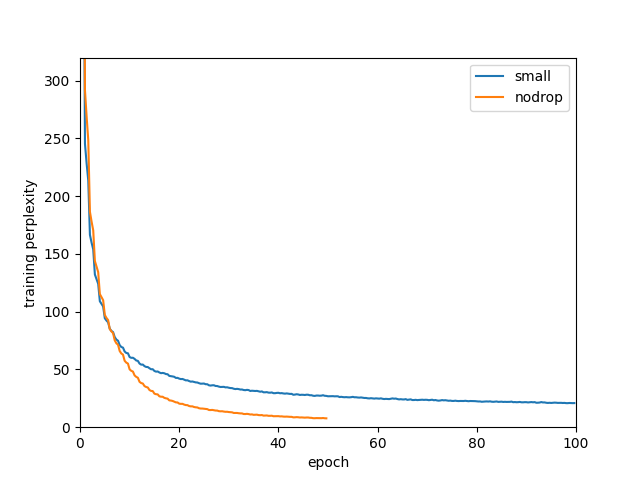

In [26]:
logdir=/models/lm/penn/saves.ptb

get_training_ppls() {
    cat $logdir/$1.log |
        perl -ne '/valid ppl/ && next; /ppl +([0-9.]+) / && print $1, ","' # < $1
}

# here we have some Perl nested in a Bash function, nested in inline Python, nested in Bash...
# I wonder whether there's some code injection vulnerability somewhere in there
python3 << EOF | display
from matplotlib import pyplot as plt
import sys

yvals = [$(get_training_ppls small)]
xvals = [x/3 for x in range(len(yvals))]
handle_small, = plt.plot(xvals, yvals, label="small")
yvals = [$(get_training_ppls nodrop)]
xvals = [x/3 for x in range(len(yvals))]
handle_nodrop, = plt.plot(xvals, yvals, label="nodrop")
plt.legend(handles=[handle_small, handle_nodrop])
plt.xlim(0,100)
plt.ylim(0,320)
plt.xlabel('epoch')
plt.ylabel('training perplexity')
plt.savefig(sys.stdout)
EOF

c)  Look at the validation perplexities. How are they changing
    across files?

In [27]:
cat /models/lm/penn/saves.ptb/best.log |
    perl -lne '/valid ppl +(\S+) / && print $1'

# for logfile in /models/lm/penn/saves.ptb/*.log
# do
#     logname=$(basename $logfile)
#     logname=${logname%%.log}
#     perl -ne '/valid ppl +(\S+) / && print $1, " "' < $logfile > /tmp/valid-ppls-${logname}.txt
# done

329.10
210.05
192.61
145.94
134.84
119.21
112.46
105.92
101.31
97.24
95.24
92.40
90.59
88.13
86.52
87.30
83.64
83.79
82.02
81.85
80.99
80.34
79.49
78.81
78.03
77.29
77.23
77.43
76.64
76.02
76.05
75.13
75.78
74.95
74.90
74.42
73.96
73.41
73.51
72.72
72.93
72.54
72.71
72.46
72.71
71.93
71.51
71.61
71.35
71.41
73.82
67.48
67.16
66.93
66.67
66.51
66.37
66.26
66.15
66.06
65.98
65.91
65.84
65.77
65.69
65.62
65.55
65.50
65.44
65.38
65.32
65.27
65.22
65.16
65.12
65.06
65.02
64.97
64.93
64.88
64.84
64.79
64.75
64.70
64.66
64.61
64.57
64.53
64.50
64.46
64.42
64.39
64.35
64.32
64.29
64.26
64.23
64.20
64.17
64.14
64.11
64.07
64.04
64.01
63.98
63.95
63.93
63.90
63.87
63.84
63.81
63.78
63.75
63.73
63.70
63.67
63.65
63.62
63.60
63.57
63.55
63.53
63.51
63.48
63.46
63.44
63.41
63.39
63.37
63.34
63.32
63.30
63.28
63.26
63.23
63.21
63.19
63.17
63.15
63.13
63.11
63.09
63.08
63.06
63.04
63.02
63.00
62.99
62.97
62.95
62.94
62.92
62.91
62.89
62.87
62.86
62.84
62.83
62.81
62.80
62.78
62.77
62.75
62.74
62.72
6

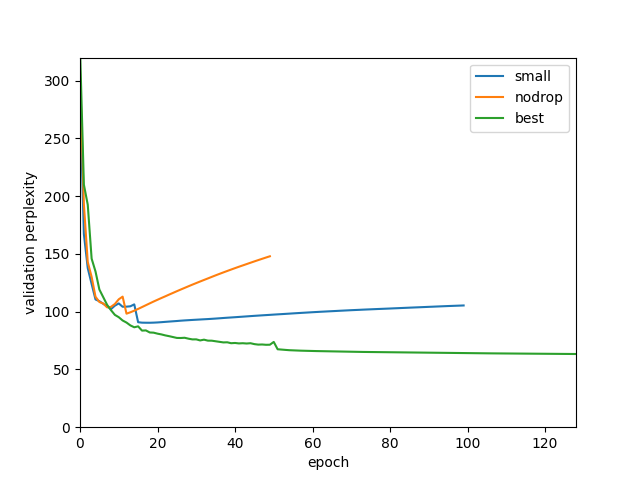

In [28]:
get_valid_ppls() {
    cat $logdir/$1.log |
        perl -ne '/valid ppl +([0-9.]+) / && print $1, ","' # < $1
}

python3 << EOF | display
from matplotlib import pyplot as plt
import sys

yvals = [$(get_valid_ppls small)]
xvals = [x for x in range(len(yvals))]
handle_small, = plt.plot(xvals, yvals, label="small")
yvals = [$(get_valid_ppls nodrop)]
xvals = [x for x in range(len(yvals))]
handle_nodrop, = plt.plot(xvals, yvals, label="nodrop")
yvals = [$(get_valid_ppls best)]
xvals = [x for x in range(len(yvals))]
handle_best, = plt.plot(xvals, yvals, label="best")
plt.legend(handles=[handle_small, handle_nodrop, handle_best])
plt.xlim(0,128)
plt.ylim(0,320)
plt.xlabel('epoch')
plt.ylabel('validation perplexity')
plt.savefig(sys.stdout)
EOF

d)  Same for the training perplexities.

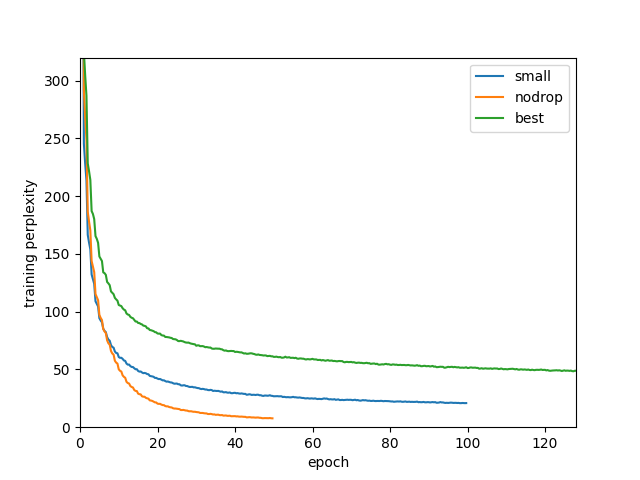

In [29]:
python3 << EOF | display
from matplotlib import pyplot as plt
import sys

yvals = [$(get_training_ppls small)]
xvals = [x/3 for x in range(len(yvals))]
handle_small, = plt.plot(xvals, yvals, label="small")
yvals = [$(get_training_ppls nodrop)]
xvals = [x/3 for x in range(len(yvals))]
handle_nodrop, = plt.plot(xvals, yvals, label="nodrop")
yvals = [$(get_training_ppls best)]
xvals = [x/3 for x in range(len(yvals))]
handle_best, = plt.plot(xvals, yvals, label="best")
plt.legend(handles=[handle_small, handle_nodrop, handle_best])
plt.xlim(0,128)
plt.ylim(0,320)
plt.xlabel('epoch')
plt.ylabel('training perplexity')
plt.savefig(sys.stdout)
EOF

## 2.  Computing Perplexity of Unseen Data

You can then try to compute the perplexity of the test data located
at `/data/lm/penn/test.txt`.  
`perplexity.py --help` will give you the required options to
proceed.  

a)  Provided the three different pre-trained models, can you compute
    the test perplexity of each of them?

*Note*: There will be a bunch of `SourceChangeWarning`s which you
can safely ignore

In [30]:
/opt/lstm-lm/perplexity.py --help

usage: perplexity.py [-h] [--train TRAIN] [--test TEST] [--model MODEL]
                     [--checkpoint CHECKPOINT] [--seed SEED] [--cuda]
                     [--batch_size BATCH_SIZE] [--output_file OUTPUT_FILE]
                     [--log-interval LOG_INTERVAL] [--reset_sentence]

PyTorch PTB Language Model

optional arguments:
  -h, --help            show this help message and exit
  --train TRAIN         location of the data corpus
  --test TEST           location of the data corpus
  --model MODEL         type of recurrent net (LSTM, QRNN)
  --checkpoint CHECKPOINT
                        model checkpoint to use
  --seed SEED           random seed
  --cuda                use CUDA
  --batch_size BATCH_SIZE
                        batch size to use
  --output_file OUTPUT_FILE
                        location of output file for each sentence
  --log-interval LOG_INTERVAL
                        reporting interval
  --reset_sentence      reset hidden state after each sentence


In [31]:
/opt/lstm-lm/perplexity.py \
    --checkpoint /models/lm/penn/saves.ptb/PTB.pt \
    --train /data/lm/penn/train.txt \
    --test /data/lm/penn/test.txt

/usr/local/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.dropout.Dropout' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.sparse.Embedding' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torch.nn.modules.container.ModuleList' has changed. you can retrieve the original source code by accessing the object's source attribute or

## 3.  Generating new Data from the Model

A nice thing about the neural language model is that it can easily
be used as a generational model, e. g. it can generate new data.  
`generate.py` will help you generate new sentences from a model that
we trained on 1 million words of Wikipedia text. After you start the
program you can give it a prefix, and it will generate a
continuation, e. g. supplying *"the meaning of life is"* as input
will generate a sentence starting with this input.

Take a look at the output generated by the model. Can you assess the
quality of the generated sentences?

a)  Are they grammatically correct?

In [32]:
echo "the meaning of life is" |
    /opt/lstm-lm/generate.py \
    --checkpoint /models/lm/penn/saves.ptb/PTB.pt \
    --data /data/lm/penn 2>/dev/null |
    sed 's/ <eos> /\n/g'

Enter your input (lower-cased :)):the meaning of life is selected in the N have purchased the year in one centuries and $ N in automobile stunning losses
this
was one of the N institutions that discover that future owners faced a inserted personal operating commitment as the home
opposing the control of three cosmetics boards sold opted for smokers
he added that most examples that the stable
will be negotiation
promises of money will be extremely costly he said compared with outperform taxi buyers chevrolet is
thought other than the federal
the stock market 's plunge third-largest sums under government considers a ferranti set for
its nose toward major interest-rate purchases in the european market analysts said
combined their surplus at N billion marks
a year and their figures expressed early in the past of describing what it means for companies to find the
first public critical said michael l. republics an industry adviser in new york
the firms say that that as
of the end of this yea

b)  Can you find any semantic connection between sentences/phrases
    being generated?
  - Very little coherence, the model doesn't stick to any topic for more than a couple of words. The LSTM model doesn't seem consider context/history more than a few words in the past.

Task 4: Preprocessing
=============

Tokenization
------------

Tokenization, in brief terms, is the task of breaking down the text
stream into discrete units, called *tokens*. Before looking at
tokenization, let's first take a look at the data itself:


In [33]:
head /data/nc19/europarl-v9.en

Resumption of the session
I declare resumed the session of the European Parliament adjourned on Friday, 15 December 2000.
Statements by the President
Ladies and gentlemen, on Saturday, as you know, an earthquake struck Central America once again, with tragic consequences.
This is an area which has already been seriously affected on a number of occasions since the beginning of the twentieth century.
The latest, provisional, figures for victims in El Salvador are already very high.
There are 350 people dead, 1 200 people missing, the area is completely devastated and thousands of homes have been destroyed throughout the country.
The European Union has already shown its solidarity by sending a rescue team to the area, whilst financial assistance from the Union and Member States has been, or is in the process of being, released and I am able to inform you that some groups in the European Parliament have requested that this issue be included in the debate on topical and urgent subjects of m

First, let's manually try to extract the unique words in this corpus.
The following command will extract a (sorted and de-duplicated) list of
tokens, as well as an occurrence count for each of them, from the text
file:

In [34]:
cat /data/nc19/europarl-v9.en | tr ' ' '\n' | sort | uniq -c > /tmp/europarl.hist

Then read the file *europarl.hist*. Try to answer the following
questions:

-   How many items (words separated by space) are there in the original
    europarl-v9.en data?

In [35]:
wc -l < /tmp/europarl.hist

329276


-   Is each one of the items totally unique, or can you spot some
    obvious redundancies?

In [36]:
cat /tmp/europarl.hist | grep -i ' *[0-9]*  *example'

      2 Example
    162 Examples
      1 Examples,
  11829 example
     12 example!
      4 example'
      1 example',
      1 example'.
     23 example)
     20 example),
     11 example).
      1 example)?
  16499 example,
   2328 example.
      1 example.4.If
      1 example.I
    379 example:
     46 example;
     91 example?
      1 example?!
   2263 examples
      2 examples)
      2 examples),
      3 examples).
    254 examples,
    438 examples.
    144 examples:
      9 examples;
      6 examples?
      1 examplesas
      1 example…


-   Does the phenomenon in question affect statistical models (such as
    $n$-gram models) or probabilistic models such as neural language
    models?
  - Yes, it affects both. With more vocabulary words and less samples per word the maximum-likelihood estimation for the word embeddings, as well as the $n$-gram probabilities will yield worse estimations

Tokenization aims at solving the problems that we observed. For
languages such as English and German, the tools are often implemented
with rule-based approaches. A standard tool for such tokenization is
`tokenizer.perl` from the `Moses` SMT project:

In [37]:
echo 'This is an example, (it shows how "tokenziation" works).' |
    sacremoses tokenize 2>/dev/null

This is an example , ( it shows how &quot; tokenziation &quot; works ) .


You can run the tool to tokenize your input file:

In [38]:
sacremoses tokenize < /data/nc19/europarl-v9.en > /tmp/europarl-v9.tok.en

Note: The file name is a typical convention in the Natural Language
Processing (NLP) community. The 'tok' suffix is just a naming
convention, telling that tokenization is applied on top of the input
file.

Now you can try to extract to vocab again.

In [39]:
cat /tmp/europarl-v9.tok.en | tr ' ' '\n' | sort | uniq -c > /tmp/europarl.tok.hist

The tokenized text file is always longer than the original one. By using
the `wc` command you can verify if your command ran correctly or not.
How many words do you now have in this vocabulary?

In [40]:
wc -l < /tmp/europarl.tok.hist

140483


True-Casing
-----------

When you look at the vocabulary file, you will probably find there to
still be some duplicate words, once in upper-case form and once in
lower-case form: 

In [41]:
cat /tmp/europarl.tok.hist | grep -i ' *[0-9]*  *example$'

      2 Example
  31252 example


The more we can
reduce the number of duplication the better, so after tokenization we
will use a true-casing tool to strip even more redundancy.  
We apply the true-casing in a 2 step procedure:

1.  train a true-casing model to get the "true" case of each vocabulary
    word using  
    `$ sacremoses train-truecase -m /tmp/truecase-model.en < /tmp/europarl-v9.tok.en`

2.  apply the model to the data to convert upper-cased words at the the
    beginning of the sentence to their respective "true" case:  
    `$ sacremoses truecase -m /tmp/truecase-model.en < /tmp/europarl-v9.tok.en > /tmp/europarl-v9.true.en`  
    (it may take a few minutes to complete)

In [42]:
# sorry, `sacremoses train-truecase` seems to be buggy
sacremoses tokenize < /tmp/europarl-v9.tok.en |
    python3 -c 'import sys; from sacremoses import MosesTruecaser; mtr = MosesTruecaser(); mtr.train([line.split(" ") for line in sys.stdin], save_to="/tmp/truecase-model.en")'
grep / /tmp/truecase-model.en | grep -v '^ *(' > /tmp/truecase-model.new.en

In [56]:
#sacremoses train-truecase -m /tmp/truecase-model.en < /tmp/europarl-v9.tok.en
sacremoses truecase -m /tmp/truecase-model.new.en < /tmp/europarl-v9.tok.en > /tmp/europarl-v9.true.en

Note that we need the tokenized text file to train the model (Why? What
would happen if we use the original file?).  

If you check the model file
contents, you will see it simply contains statistics about upper-case
and lower-case occurrences for each word.

In [54]:
head -n128 /tmp/truecase-model.new.en

of (2040182/2040314) OF (73) Of (59)
the (3980832/3988538) The (7706)
declare (1672/1672)
resumed (1382/1382)
session (3046/3144) Session (98)
European (337403/337412) european (7) EUROPEAN (2)
Parliament (130521/133069) parliament (2548)
adjourned (598/598)
on (552645/552953) On (308)
Friday (1172/1172)
December (7753/7753)
by (290781/290833) By (52)
and (1621667/1621744) And (54) AND (23)
gentlemen (30866/30922) Gentlemen (56)
Saturday (379/379)
as (358767/359422) As (655)
you (129728/129945) You (217)
know (36502/36504) Know (2)
an (189431/189556) An (124) AN (1)
earthquake (833/838) Earthquake (5)
struck (1192/1192)
Central (6880/12782) central (5902)
America (4665/4665)
once (17248/17278) Once (29) ONCE (1)
again (26169/26171) AGAIN (1) Again (1)
with (355486/355683) With (197)
tragic (2337/2337)
consequences (9592/9593) Consequences (1)
is (932988/933049) Is (59) IS (2)
area (35723/36774) Area (1051)
which (335299/335308) Which (9)
has (254931/254947) Has (16)
already (39201/3920

In [55]:
echo 'Listen Potato Word Peter Germany USA' |
    sacremoses truecase -m /tmp/truecase-model.new.en
echo
grep -E -i '^(Listen|Potato|Word|Peter|Germany|USA) ' /tmp/truecase-model.en

listen potato Word Peter Germany USA

word (4988/4996) Word (7) WORD (1)
Germany (6190/6190)
listen (2362/2369) Listen (7)
USA (3041/3041)
potato (245/245)
Peter (243/250) peter (7)


With the true-cased text you can now try to extract to vocab again.

In [57]:
cat /tmp/europarl-v9.true.en | tr ' ' '\n' | sort | uniq -c > /tmp/europarl.true.hist

If we did everything correctly the vocabulary size should have further
decreased.  
What is the vocabulary size at the moment?

In [58]:
wc -l < /tmp/europarl.true.hist

134582


Try to look at the histogram file a little bit more.  
Notice that many words share the same root and differ in suffixes or prefixes. 

In [59]:
cat /tmp/europarl.true.hist | grep -i ' *[0-9]*  *listen'

      5 Listen
      2 Listening
   2403 listen
   1718 listened
     10 listener
     29 listeners
   1438 listening
     92 listens


Also most of the items in the vocabulary appear only once in the data (especially
numbers).

In [60]:
cat /tmp/europarl.true.hist | grep ' *1 ' | wc -l
cat /tmp/europarl.true.hist | grep ' *1 [0-9][0-9]*$' | wc -l

58757
1334


What could be the problem for algorithms that learn embeddings or
statistical/probabilistic models in general? (This is an open question,
and there are several problems that I can remember, but in general it
comes from the curse of dimensionality).

Byte-Pair Encoding
------------------

Byte-Pair Encoding (BPE) is an algorithm that helps us automatically
split words into smaller components. Since BPE is also a statistical
algorithm, first we need to extract the statistics from our data:

In [61]:
subword-nmt learn-bpe -s 32000 < /tmp/europarl-v9.true.en > /tmp/code.en

100%|####################################| 32000/32000 [01:03<00:00, 504.80it/s]


In [62]:
wc -l /tmp/code.en

32001 /tmp/code.en


Similar to true-casing, after training the BPE codes we have to apply it
to the data:

In [63]:
subword-nmt apply-bpe -c /tmp/code.en < /tmp/europarl-v9.true.en > /tmp/europarl-v9.bpe.en

Now you can check the vocabulary size once more:

In [64]:
cat /tmp/europarl-v9.bpe.en | tr ' ' '\n' | sort | uniq -c > /tmp/europarl.bpe.hist

In [65]:
wc -l < /tmp/europarl.bpe.hist
echo
cat /tmp/europarl.bpe.hist | grep -i ' *[0-9]*  *listen'
echo
echo 'listeners andaverylongword' | subword-nmt apply-bpe -c /tmp/code.en

31523

   2403 listen
     39 listen@@
   1719 listened
   1438 listening
     92 listens

listen@@ ers an@@ da@@ very@@ long@@ word
